In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from datetime import datetime
import os
import seaborn as sns
import metpy.calc as mpcalc
import re
import calendar
from matplotlib.offsetbox import AnchoredText
sns.set()

In [2]:
datann = xr.open_dataset("SP_10_20.nc")
datann

<xarray.Dataset>
Dimensions:    (expver: 2, latitude: 241, longitude: 361, time: 122)
Coordinates:
  * longitude  (longitude) float32 -70.0 -69.75 -69.5 -69.25 ... 19.5 19.75 20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -49.5 -49.75 -50.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-02-01
Data variables:
    sp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-25 23:58:57 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [3]:
def figura(per):
    
    fig, ax = plt.subplots(nrows=4, ncols=3, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(32,26))
    fig.suptitle('Suface Pressure (Monthly Means)\nClimatologia de 2010 a 2020', fontsize=34, weight='bold', y = 0.95, x = 0.505)
    
    mes = [1,2,3,4,5,6,7,8,9,10,11,12]
    
    plott(ax[0,0], mes[0], per = per)
    plott(ax[0,1], mes[1], per = per)
    plott(ax[0,2], mes[2], per = per)
    plott(ax[1,0], mes[3], per = per)
    plott(ax[1,1], mes[4], per = per)
    plott(ax[1,2], mes[5], per = per)
    plott(ax[2,0], mes[6], per = per)
    plott(ax[2,1], mes[7], per = per)
    plott(ax[2,2], mes[8], per = per)
    plott(ax[3,0], mes[9], per = per)
    plott(ax[3,1], mes[10], per = per)
    plott(ax[3,2], mes[11], per = per)
    
    #exportar(per)
                                                

In [4]:
def plott(ax, mes, per):
    
    coordenadas, media_mes = set_data(per)
    clevs = np.arange(700,1050,50)
    
    
    cf = ax.contourf(coordenadas[1],coordenadas[0], media_mes.sel(month=mes)/100, clevs, cmap ='Blues')
    
    cbar = plt.colorbar(cf, orientation='horizontal', pad=0.2 , ax=ax, shrink = 1.0, aspect=40)
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label("hPa", fontsize = 17, y = 0.3)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.3, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.ylines = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator(np.arange(-70, 50, 20)) #-70,50,20
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 15}
    gl.ylabel_style = {'size': 15}
    
    ax.coastlines('50m')
    ax.set_title(calendar.month_abbr[mes], fontdict={'fontsize': 20}, loc = 'right')  
    

In [5]:
def set_data(per):
    
    data = xr.open_dataset("SP_10_20.nc")
    sp = data.sp[:,0,:,:]

    time_slice = slice(per[0],per[1])

    media_mes = sp.sel(time=time_slice).groupby('time.month').mean()

    coordenadas = [media_mes.latitude.values , media_mes.longitude.values]
    
    return coordenadas , media_mes

In [6]:
def exportar(per):
    
    path = os.path.join(os.getcwd(), per[0][2:4] + "_" + per[1][2:4])
    if os.path.exists(path):
        plt.savefig(os.path.join(path, "SP_2010_2020" +
                              ".png"))
    else:
        os.mkdir(path)
        plt.savefig(os.path.join(path, "SP_2010_2020" +
                              ".png"))

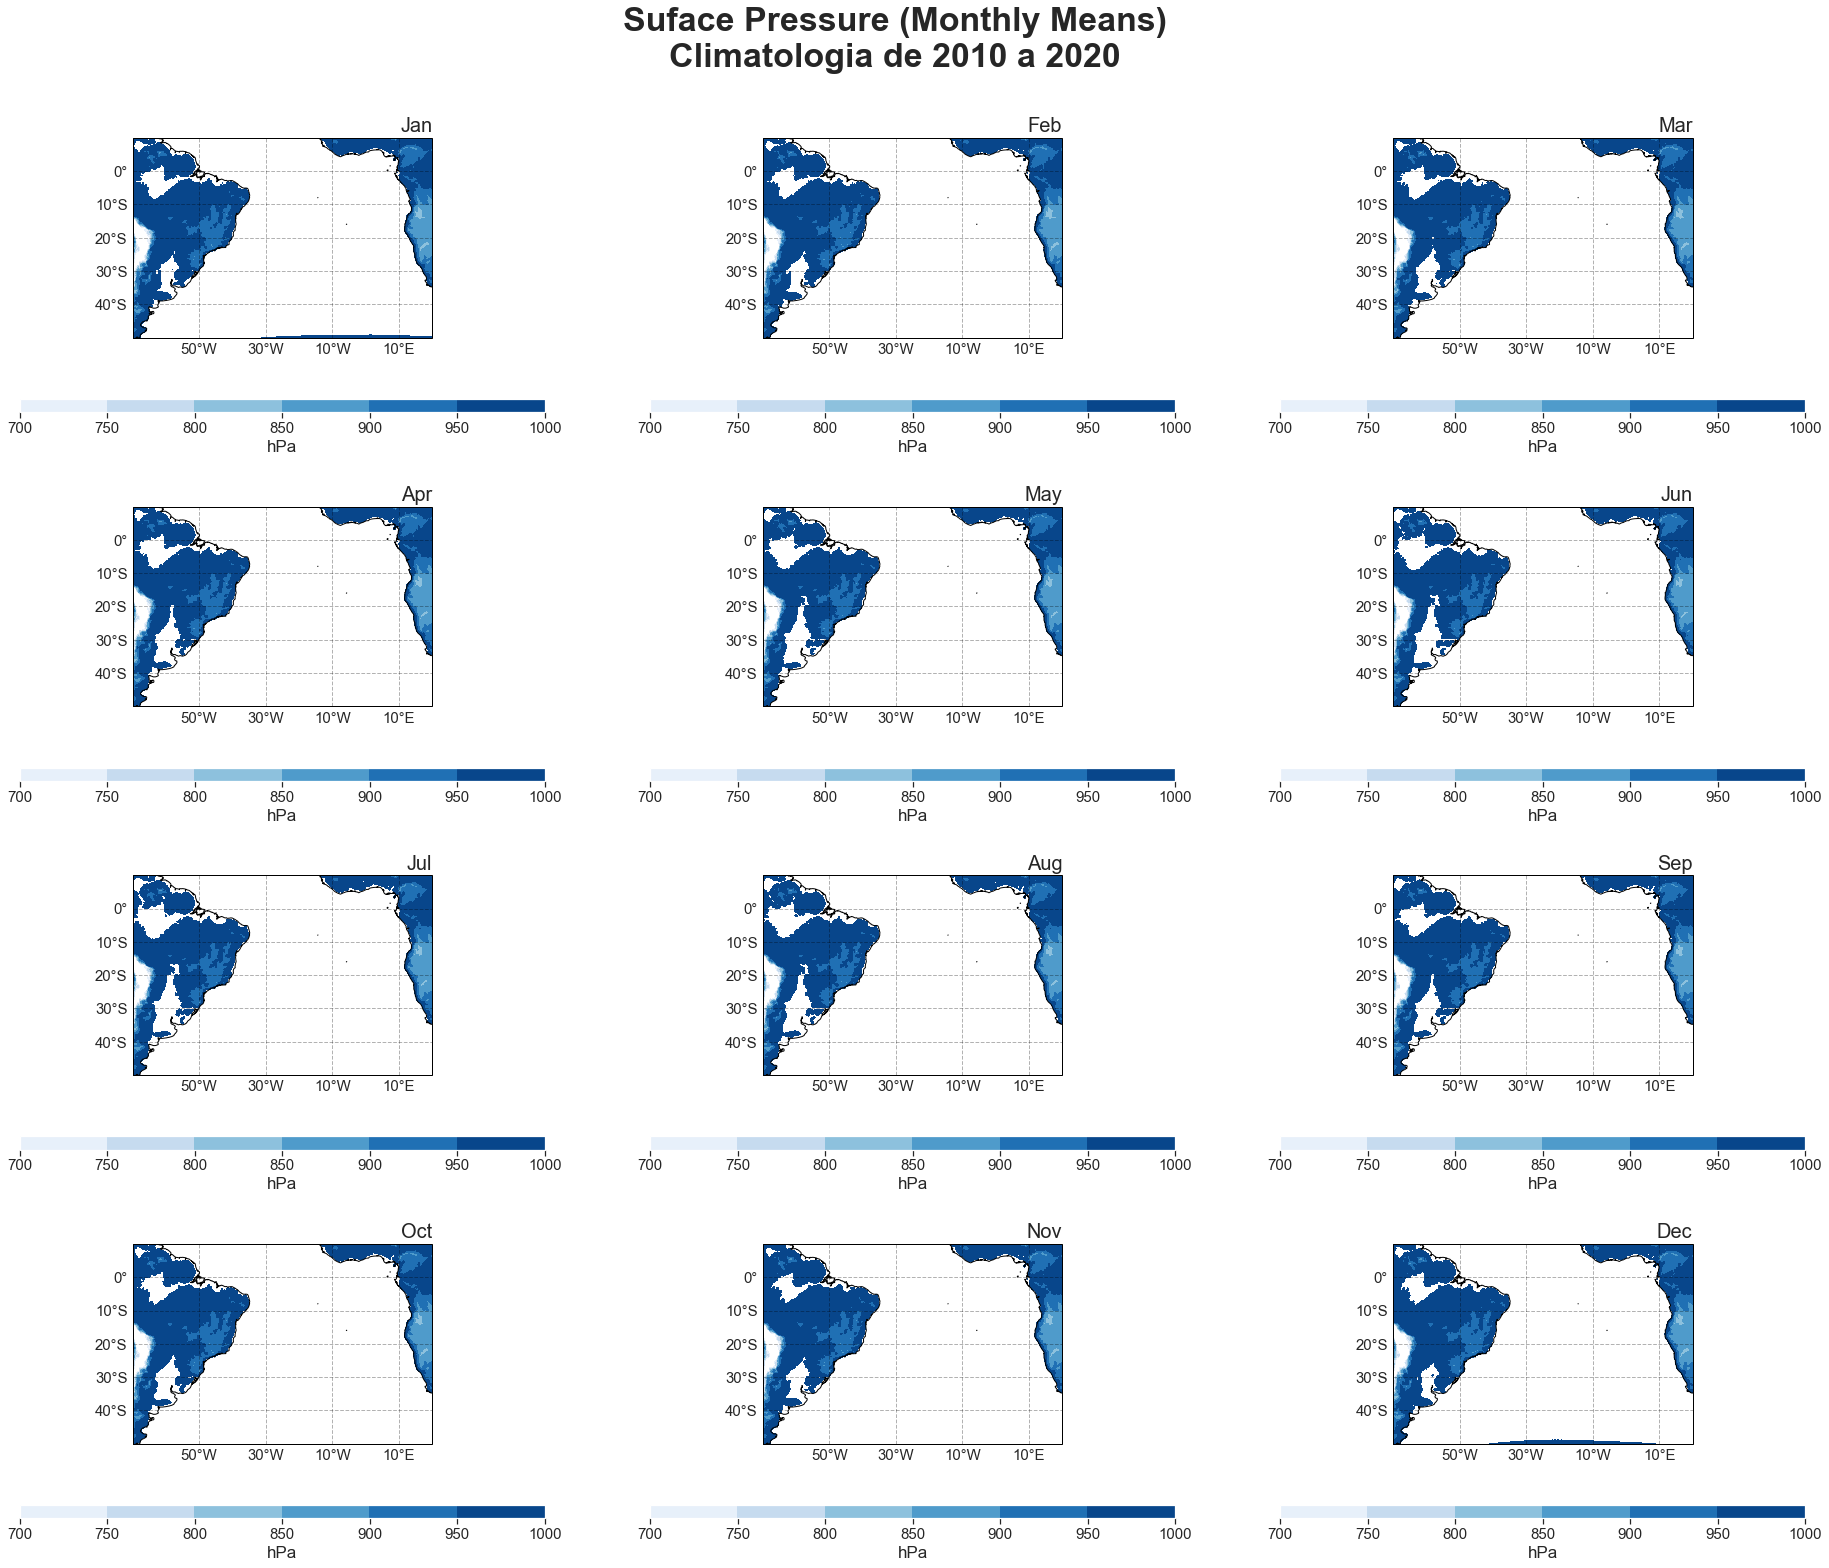

In [7]:
tempo = ['2010-01-01','2020-02-01']
figura(tempo)